In [1]:
import os
import glob
import collections
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori as mx_apriori
from mlxtend.frequent_patterns import association_rules as mx_association_rules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 10)

### Show the images

In [ ]:
DATA_PATH = '/Users/liyuxiao/Downloads/DH2022/History and the Digital/projects/images/'

for i in range(50): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(50,100): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(100,150): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(150,200): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(200,250): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(250,300): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(300,350): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

In [ ]:
for i in range(350,402): 
    a = mpimg.imread(DATA_PATH + files_containing_animals[i])
    plt.figure(i+1)
    plt.title(files_containing_animals[i])
    plt.imshow(a)

### Get the names of paintings containing dog

In [36]:
with open('files_containing_dogs_filtered.txt', 'r') as file_in:
    painting_list = []
    for line in file_in:
        painting_list.append(line[:-1])

### Get the metadata

In [51]:
dog_paintings_df = pd.read_csv('dog_paintings.csv')

In [54]:
dog_paintings_df.head()

,Unnamed: 0,artist,date,genre,source,style,title,new_filename,nationality,Gender
0,46524,Francisco Goya,1799,portrait,wikiart,Romanticism,King Carlos IV in Hunting Costume,14942.jpg,Spain,man
1,30894,Francisco Goya,1795,portrait,wikiart,Romanticism,"Duchess of Alba, The White Duchess",100990.jpg,Spain,man
2,65288,John Hoppner,1795,portrait,wikiart,Romanticism,The Frankland Sisters,2553.jpg,United Kingdom,man
3,62339,George Romney,1793,portrait,wikiart,Rococo,"Anna Maria Hunt (c.1771_1861), the Honourable ...",41442.jpg,United Kingdom,man
4,7910,Vladimir Borovikovsky,1790,portrait,wikiart,Rococo,Naryshkina__lena,69377.jpg,Ukraine,man


### Styles Distribution

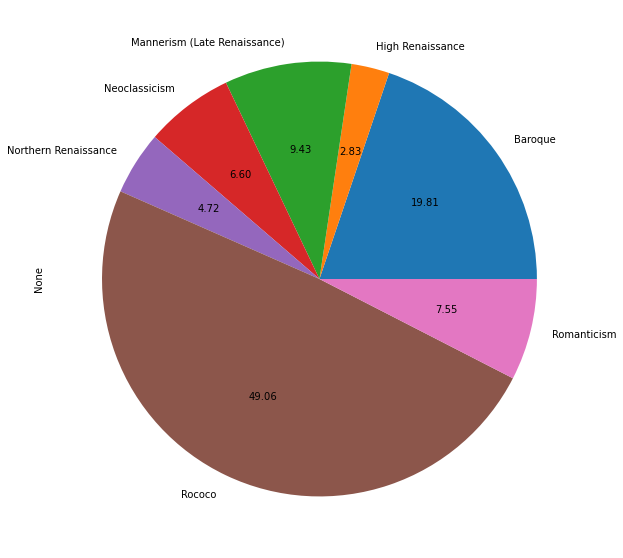

In [55]:
dog_paintings_df.groupby('style').size().plot(kind='pie', autopct='%.2f');

### Nationality Distribution

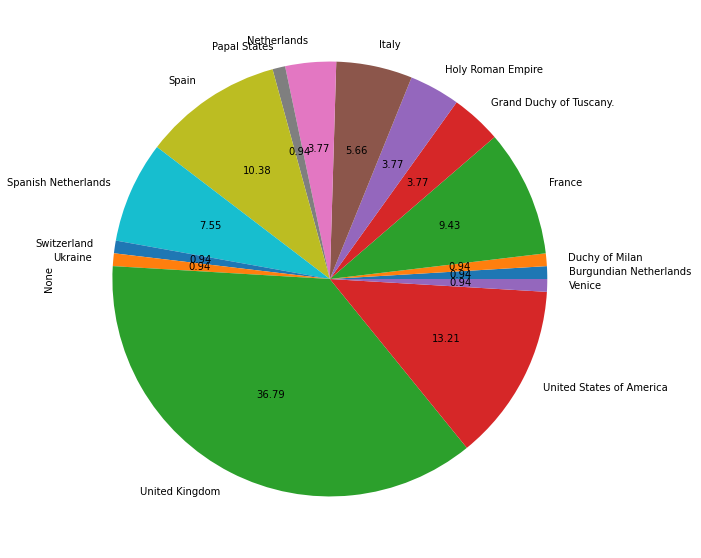

In [57]:
dog_paintings_df.groupby('nationality').size().plot(kind='pie', autopct='%.2f');

### Gender Distribution

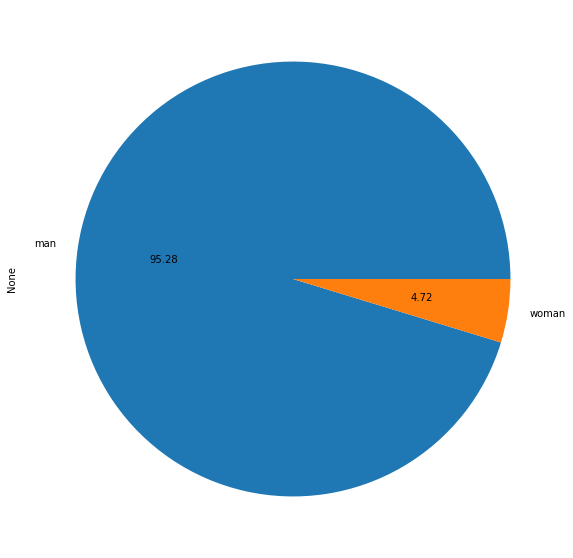

In [59]:
dog_paintings_df.groupby('Gender').size().plot(kind='pie', autopct='%.2f');

### Year Distribution

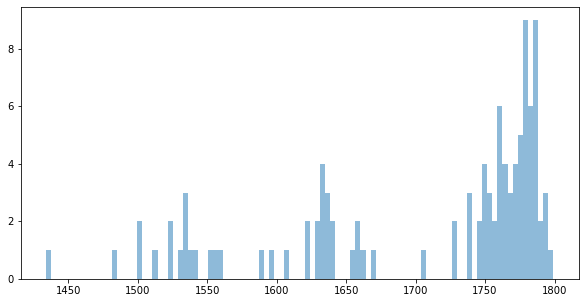

In [58]:
plt.figure(figsize=(10,5))
plt.hist(dog_paintings_df.date,bins=100, alpha=0.5)
plt.show()

### Read the detection results

In [139]:
df

,Unnamed: 0,detection_scores,detection_class_entities,detection_class_labels,x0,y0,x1,y1,new_filename
0,0,0.945436,b'Dog',446,0.632977,0.094359,0.955106,0.402796,47624.jpg
1,1,0.749950,b'Footwear',434,0.861733,0.584891,0.950500,0.677815,47624.jpg
2,2,0.685945,b'Clothing',433,0.191417,0.258418,0.694615,0.570915,47624.jpg
3,3,0.477581,b'Person',69,0.106676,0.234378,0.929100,0.809795,47624.jpg
4,4,0.441885,b'Human face',502,0.127250,0.309664,0.217167,0.374057,47624.jpg
...,...,...,...,...,...,...,...,...,...
95,95,0.006153,b'Human hand',573,0.307965,0.516490,0.371873,0.599559,47624.jpg
96,96,0.006041,b'Human hand',573,0.318570,0.493748,0.442656,0.584919,47624.jpg
97,97,0.006012,b'Plant',334,0.032671,0.538205,0.353967,0.730497,47624.jpg
98,98,0.005923,b'Human arm',503,0.226335,0.442163,0.369068,0.556857,47624.jpg


In [140]:
path = "./result"
filenames = glob.glob(path + "/*.csv")
item_list = {}

for filename in filenames:
    if filename[9:-4] in painting_list:
        df = pd.read_csv(filename)
        df = df[df['detection_scores']>0.1]
        item_list[filename] = df['detection_class_entities'].apply(lambda x: x[2:-1]).tolist()

### Check the number of a certain object

In [141]:
#result = sum(item_list, [])
#counter=collections.Counter(result)
delete_list = ['Clothing','Human face','Person','Human head','Human hand','Human hair','Human eye','Human nose','Human beard','Human arm', 'Human body', 'Mammal', 'Animal', 'Carnivore']

animal_item_list = []
files_containing_animals = []
for list in item_list.keys():
    if 'Dog' in item_list[list]:
        files_containing_animals.append(list)
        for item in delete_list:
            while (item in item_list[list]):
                try:
                    item_list[list].remove(item)
                except:
                    pass
        animal_item_list.append(item_list[list])

print(len(animal_item_list))

82


In [ ]:
#Filename
files_containing_animals = [file[9:-4] for file in files_containing_animals]

In [ ]:
#Save in txt file
with open('files_containing_dogs.txt', 'w') as f:
    for item in files_containing_animals:
        f.write("%s\n" % item)

## Support

In [87]:
def print_support_mx(df,max_display=10,min_items=1):
    print('support\t itemset')
    print('-'*30)
    lenrow = df['itemsets'].apply(lambda x: len(x))
    df  = df[lenrow>=min_items]
    df  = df.sort_values('support',ascending=False).iloc[:max_display]
    for i,row in df.iterrows():
        print("%.2f" % float(row['support']),'\t',set(row['itemsets']))

In [142]:
df_dummy = pd.get_dummies(pd.Series(animal_item_list).apply(pd.Series).stack()).sum(level=0)
for idx, row in df_dummy.iterrows():
    for column in df_dummy.columns:
        if row[column]>1:
            df_dummy.iloc[idx][column] = 1

/var/folders/f8/0gc63p0s55g3jx1xwrb_vh7w0000gn/T/ipykernel_4385/1154583098.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  df_dummy = pd.get_dummies(pd.Series(animal_item_list).apply(pd.Series).stack()).sum(level=0)


In [143]:
frequent_itemsets = mx_apriori(df_dummy, min_support=0.1, use_colnames=True)

In [144]:
print_support_mx(frequent_itemsets,100,min_items=2)

support	 itemset
------------------------------
0.82 	 {'Dog', 'Woman'}
0.54 	 {'Man', 'Dog'}
0.45 	 {'Tree', 'Dog'}
0.41 	 {'Dog', 'Dress'}
0.40 	 {'Woman', 'Dress'}
0.40 	 {'Dog', 'Woman', 'Dress'}
0.40 	 {'Dog', 'Footwear'}
0.39 	 {'Man', 'Dog', 'Woman'}
0.39 	 {'Man', 'Woman'}
0.35 	 {'Tree', 'Dog', 'Woman'}
0.35 	 {'Tree', 'Woman'}
0.33 	 {'Man', 'Dog', 'Footwear'}
0.33 	 {'Man', 'Footwear'}
0.30 	 {'Woman', 'Footwear'}
0.30 	 {'Dog', 'Woman', 'Footwear'}
0.29 	 {'Dog', 'Girl'}
0.27 	 {'Woman', 'Girl'}
0.27 	 {'Dog', 'Woman', 'Girl'}
0.24 	 {'Man', 'Tree'}
0.24 	 {'Man', 'Dog', 'Tree'}
0.23 	 {'Man', 'Woman', 'Footwear'}
0.23 	 {'Fashion accessory', 'Dog'}
0.23 	 {'Tree', 'Dog', 'Footwear'}
0.23 	 {'Man', 'Dog', 'Woman', 'Footwear'}
0.23 	 {'Tree', 'Footwear'}
0.20 	 {'Fashion accessory', 'Dog', 'Woman'}
0.20 	 {'Fashion accessory', 'Woman'}
0.18 	 {'Girl', 'Dress'}
0.18 	 {'Dog', 'Girl', 'Dress'}
0.18 	 {'Man', 'Tree', 'Footwear'}
0.18 	 {'Man', 'Dog', 'Tree', 'Footwear'}
0.17 	 

## Confidence

In [146]:
def print_rules_mx(df,max_display=10):
    print('confidence\t rule')
    print('-'*30)
    df  = df.sort_values('confidence',ascending=False).iloc[:max_display]
    for i,row in df.iterrows():
        print("%.2f" % float(row['confidence']),'\t',set(row['antecedents']),'->',set(row['consequents']))

In [145]:
rules_mx = mx_association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

In [147]:
print_rules_mx(rules_mx,max_display=100)

confidence	 rule
------------------------------
1.00 	 {'Man', 'Woman'} -> {'Dog'}
1.00 	 {'Footwear', 'Dress'} -> {'Woman'}
1.00 	 {'Tree', 'Dress'} -> {'Dog', 'Woman'}
1.00 	 {'Tree', 'Woman', 'Girl'} -> {'Dog'}
1.00 	 {'Dog', 'Footwear', 'Dress'} -> {'Woman'}
1.00 	 {'Fashion accessory', 'Dress'} -> {'Woman'}
1.00 	 {'Man', 'Dress'} -> {'Dog'}
1.00 	 {'Woman', 'Footwear', 'Dress'} -> {'Dog'}
1.00 	 {'Woman', 'Footwear'} -> {'Dog'}
1.00 	 {'Tree', 'Woman', 'Dress'} -> {'Dog'}
1.00 	 {'Footwear', 'Dress'} -> {'Dog', 'Woman'}
1.00 	 {'Tree', 'Dog', 'Dress'} -> {'Woman'}
1.00 	 {'Girl', 'Dress'} -> {'Dog'}
1.00 	 {'Man', 'Dress'} -> {'Dog', 'Woman'}
1.00 	 {'Man', 'Tree'} -> {'Dog'}
1.00 	 {'Tree', 'Dress'} -> {'Woman'}
1.00 	 {'Man', 'Woman', 'Dress'} -> {'Dog'}
1.00 	 {'Man', 'Dog', 'Dress'} -> {'Woman'}
1.00 	 {'Footwear', 'Dress'} -> {'Dog'}
1.00 	 {'Man', 'Woman', 'Tree'} -> {'Dog'}
1.00 	 {'Woman', 'Girl', 'Dress'} -> {'Dog'}
1.00 	 {'Tree', 'Footwear'} -> {'Dog'}
1.00 	 {'Sculptu